In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

In [2]:
#load dataframe
cars_df = pd.read_csv('CarPrice_Assignment.csv')
#view the dataset
cars_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#let's get a summary of the dataframe
cars_df.shape

(205, 26)

In [4]:
#let's check for each column data type and ensure that everything is okay
cars_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
#Let's look at all the unique car names to ensure that they are okay.
cars_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
# Let's create an extra column for the car name and the car model.
cars_df[['car_brand', 'car_model']] = cars_df['CarName'].str.split(' ', n=1, expand=True)
cars_df.head()
cars_df['car_brand'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
#We can spot some errors in the spellings of some of the car brand names! Let's fix the spellings
cars_df['car_brand'] = cars_df['car_brand'].replace(to_replace=['maxda', 'Nissan', 'porschce', 'toyouta', 'vokswagen', 'vw'],
                                                    value=['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen','volkswagen' ])
cars_df['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
#let's check for missing data values.
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_brand           0
car_model           2
dtype: int64

In [9]:
cars_df.dropna(inplace = True)

In [10]:
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_brand           0
car_model           0
dtype: int64

In [11]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,102.630542,0.832512,98.789163,174.143842,65.922660,53.731034,2560.078818,127.147783,3.326897,3.262857,10.15133,104.399015,5127.832512,25.157635,30.694581,13347.200330
std,59.497287,1.247384,6.039964,12.338152,2.148216,2.454068,521.221484,41.773527,0.270629,0.305642,3.99058,39.631013,478.525201,6.544197,6.896356,7995.739861
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.00000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,51.500000,0.000000,94.500000,166.550000,64.100000,52.000000,2179.500000,97.500000,3.150000,3.110000,8.55000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.00000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,154.500000,2.000000,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.580000,3.410000,9.40000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.00000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_brand', 'car_model'],
      dtype='object')

C:\Users\komal\AppData\Local\Temp\ipykernel_13564\1453826092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df.price)


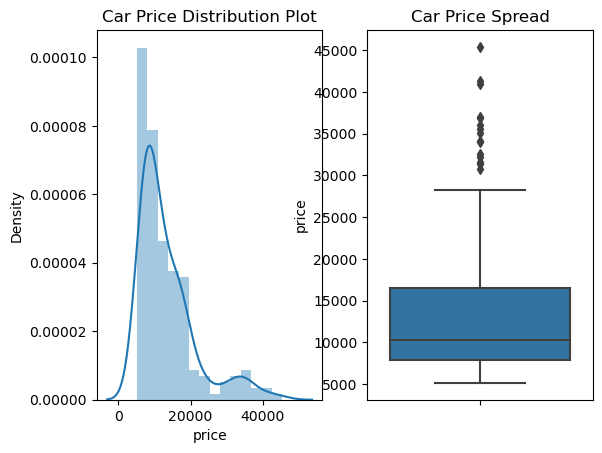

In [13]:
#Lets look at how the price of the cars is distributed
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_df.price)

plt.show()

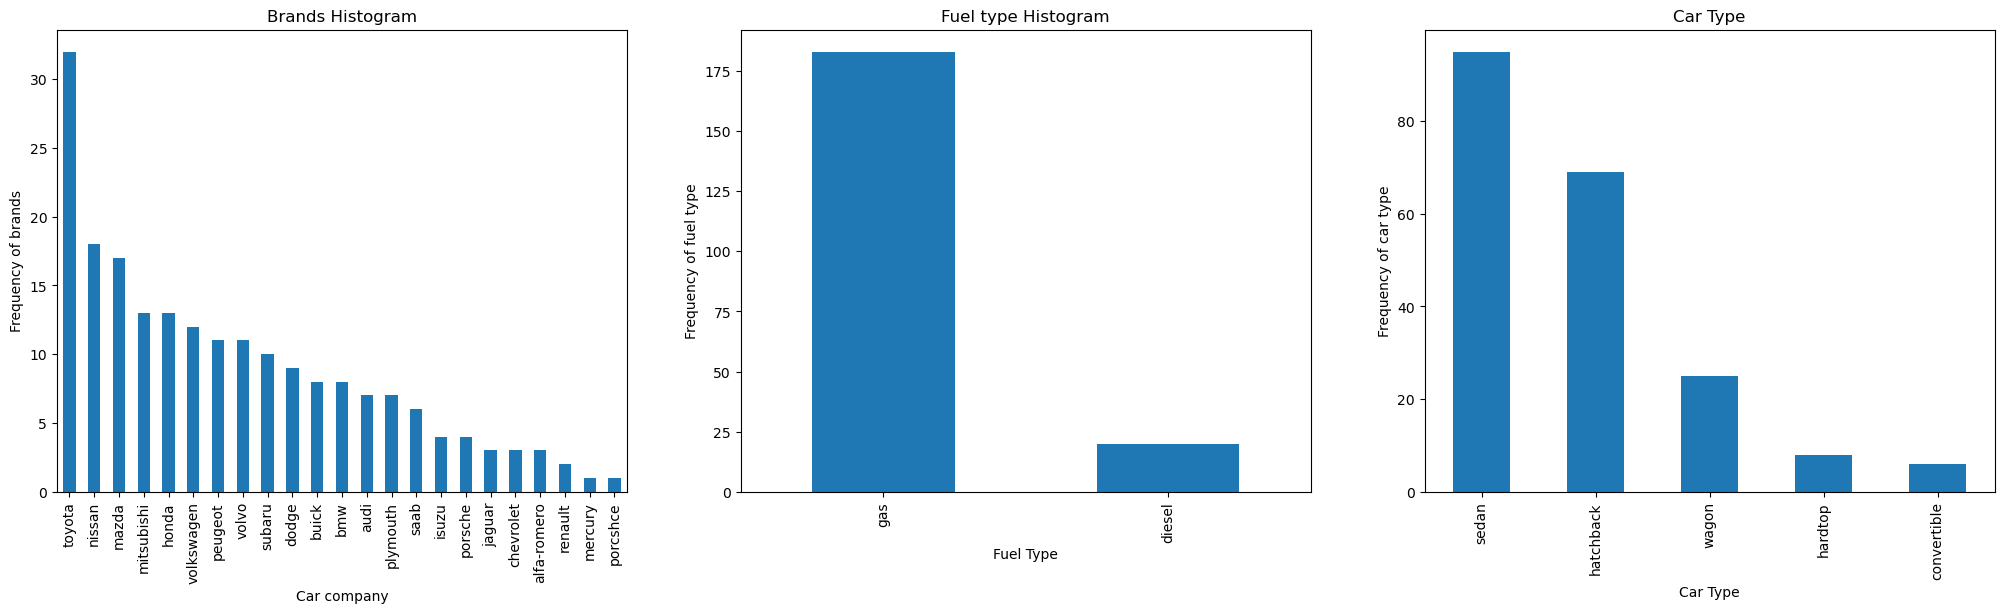

In [14]:
plt.figure(figsize=(25, 6))
#bar plot for car brands
plt.subplot(1,3,1)
plt1 = cars_df.car_brand.value_counts().plot.bar()
plt.title('Brands Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of brands')

#bar plot for fuel types
plt.subplot(1,3,2)
plt1 = cars_df.fueltype.value_counts().plot.bar()
plt1.set_title('Fuel type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')


#histogram for car type
plt.subplot(1,3,3)
plt1 = cars_df.carbody.value_counts().plot.bar()
plt1.set_title('Car Type')
plt1.set(xlabel ='Car Type', ylabel= 'Frequency of car type')

plt.show()

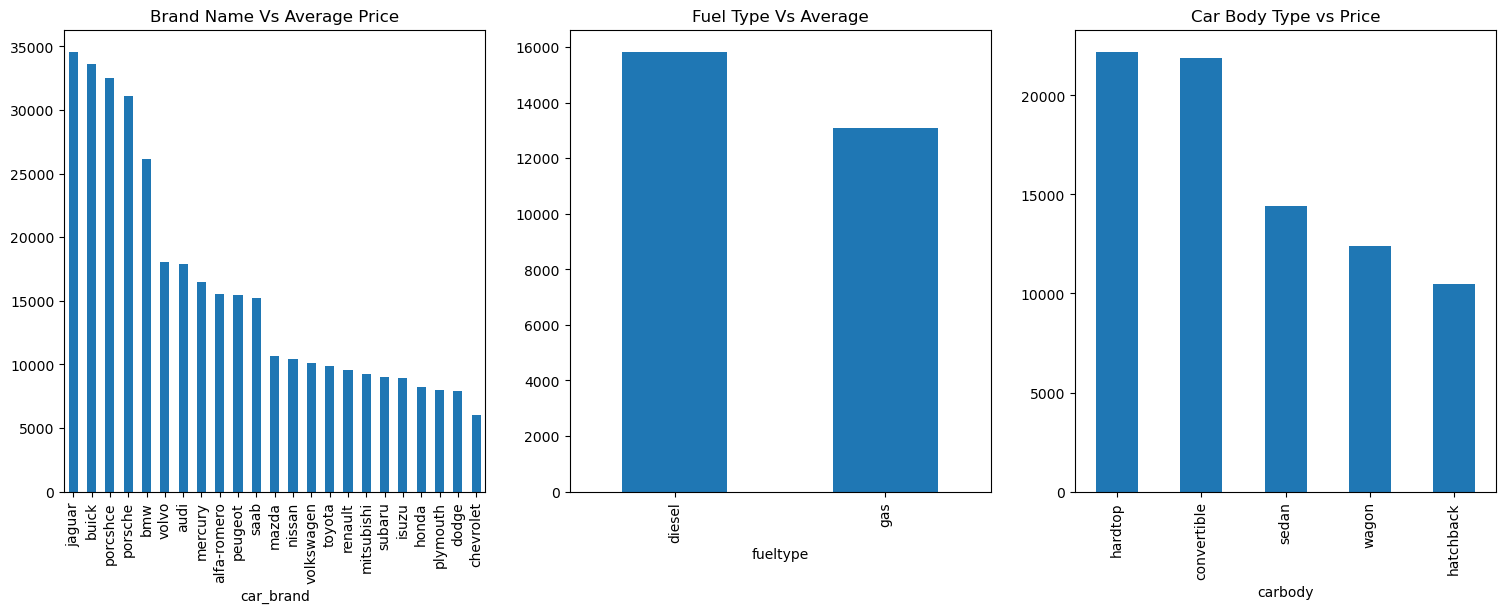

In [15]:
plt.figure(figsize=(25, 6))

#car brand vs price
brand_avg = cars_df.groupby('car_brand')['price'].mean().sort_values(ascending = False)
plt.subplot(1,4,1)
brand_avg.plot.bar()
plt.title('Brand Name Vs Average Price')

#fuel type vs price
plt.subplot(1,4,2)
fuel_avg = cars_df.groupby('fueltype')['price'].mean().sort_values(ascending = False)
fuel_avg.plot.bar()
plt.title('Fuel Type Vs Average')

#Body type vs price
plt.subplot(1,4,3)
type_avg = cars_df.groupby('carbody')['price'].mean().sort_values(ascending = False)
type_avg.plot.bar()
plt.title('Car Body Type vs Price')

plt.show()


In [16]:
print(brand_avg)

car_brand
jaguar         34600.000000
buick          33647.000000
porcshce       32528.000000
porsche        31118.625000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
subaru          9025.100000
isuzu           8916.500000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64


In [17]:
print(fuel_avg)
15838.1500 - 12999.7982

fueltype
diesel    15838.150000
gas       13074.965393
Name: price, dtype: float64


2838.3518000000004

In [18]:
print(type_avg)


carbody
hardtop        22208.500000
convertible    21890.500000
sedan          14420.252632
wagon          12371.960000
hatchback      10452.864739
Name: price, dtype: float64


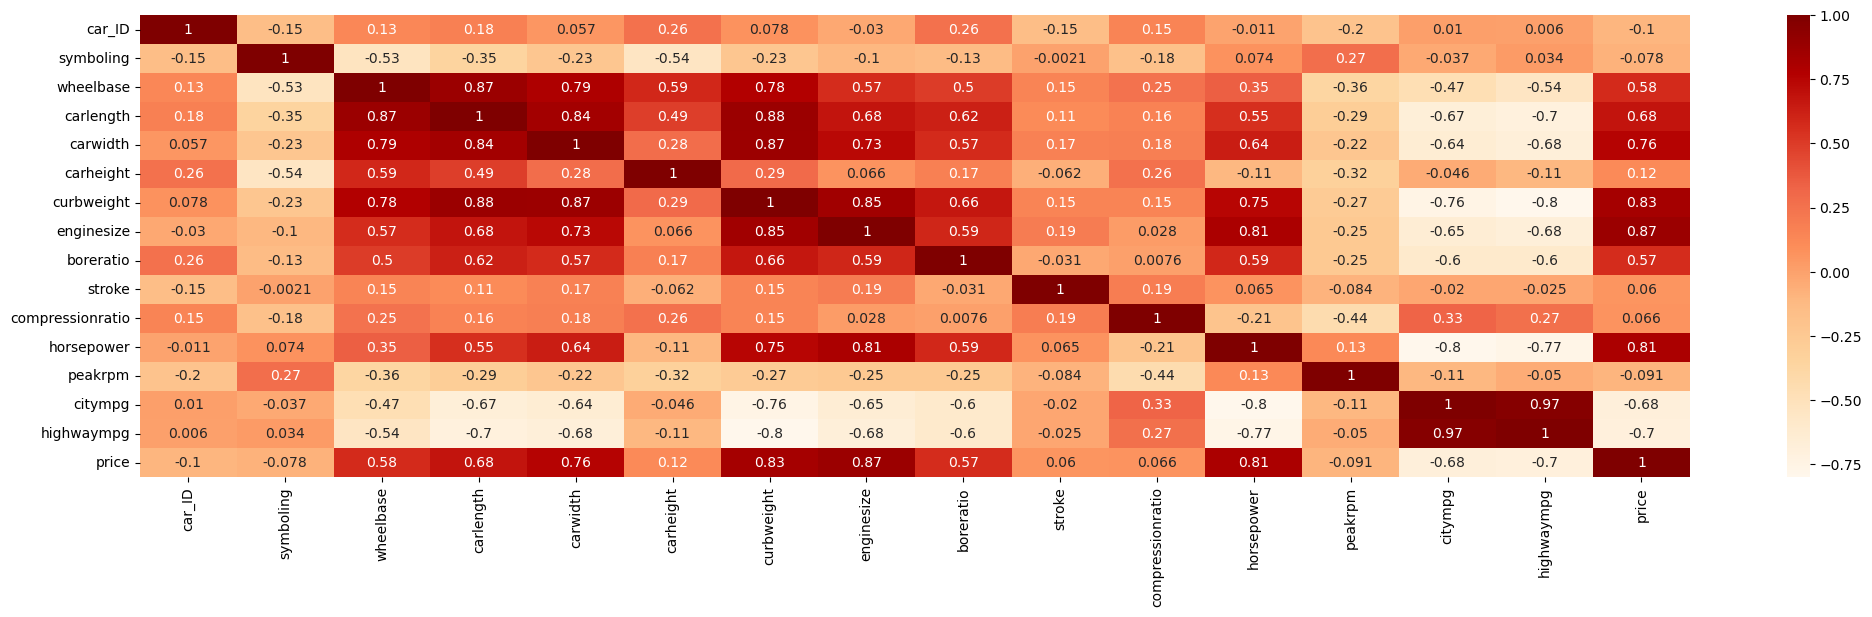

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_columns = cars_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix of the numerical columns
corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(25, 6))
sns.heatmap(corr_matrix, cmap="OrRd", annot=True)
plt.show()


<Axes: xlabel='carlength', ylabel='price'>

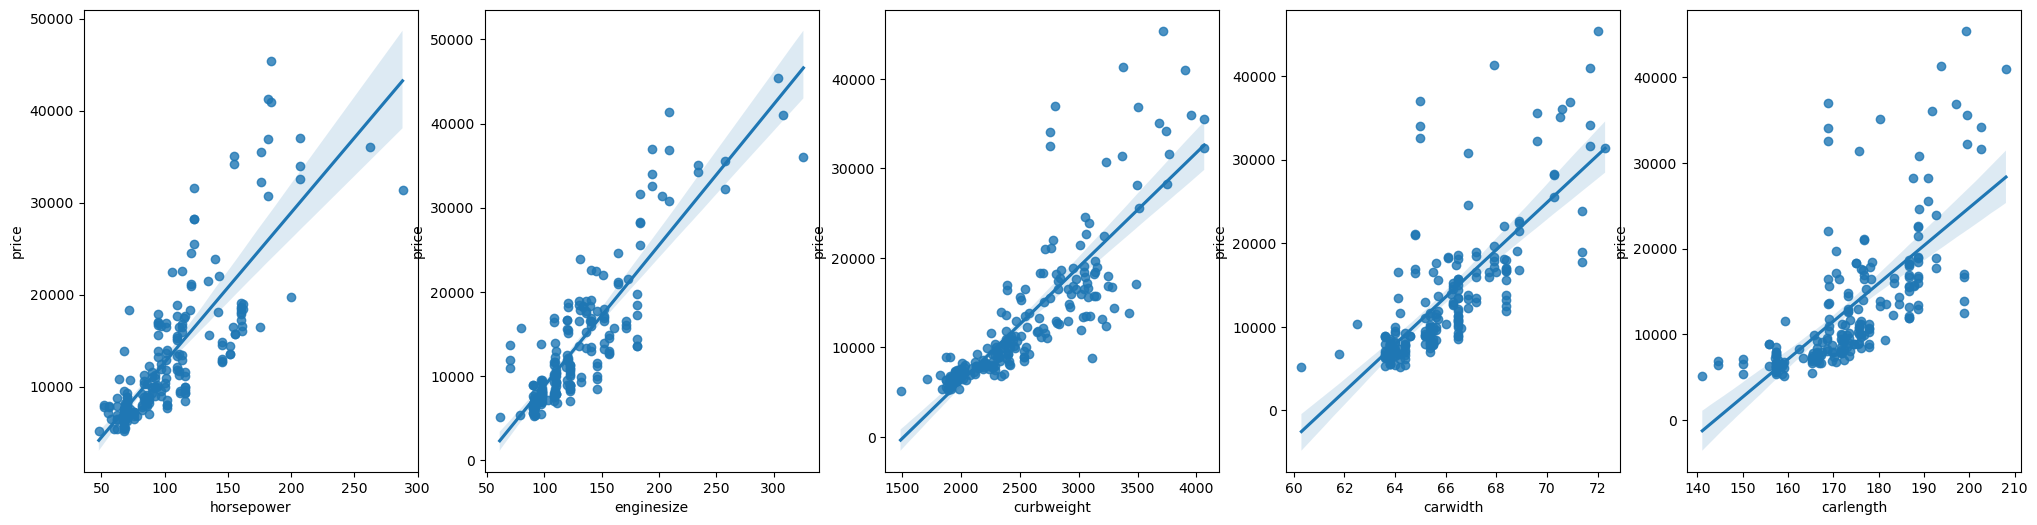

In [20]:
#regression plot
plt.figure(figsize=(25, 6))
#horspower vs price
plt.subplot(1,5,1)
sns.regplot(x= 'horsepower', y='price', data=cars_df)

#enginesize vs price
plt.subplot(1,5,2)
sns.regplot(x='enginesize', y = 'price', data=cars_df)

#curbweight vs price
plt.subplot(1,5,3)
sns.regplot(x='curbweight', y = 'price', data=cars_df)

##car width vs price
plt.subplot(1,5,4)
sns.regplot(x='carwidth', y = 'price', data=cars_df)

##car length vs price
plt.subplot(1,5,5)
sns.regplot(x='carlength', y = 'price', data=cars_df)

<Axes: xlabel='peakrpm', ylabel='price'>

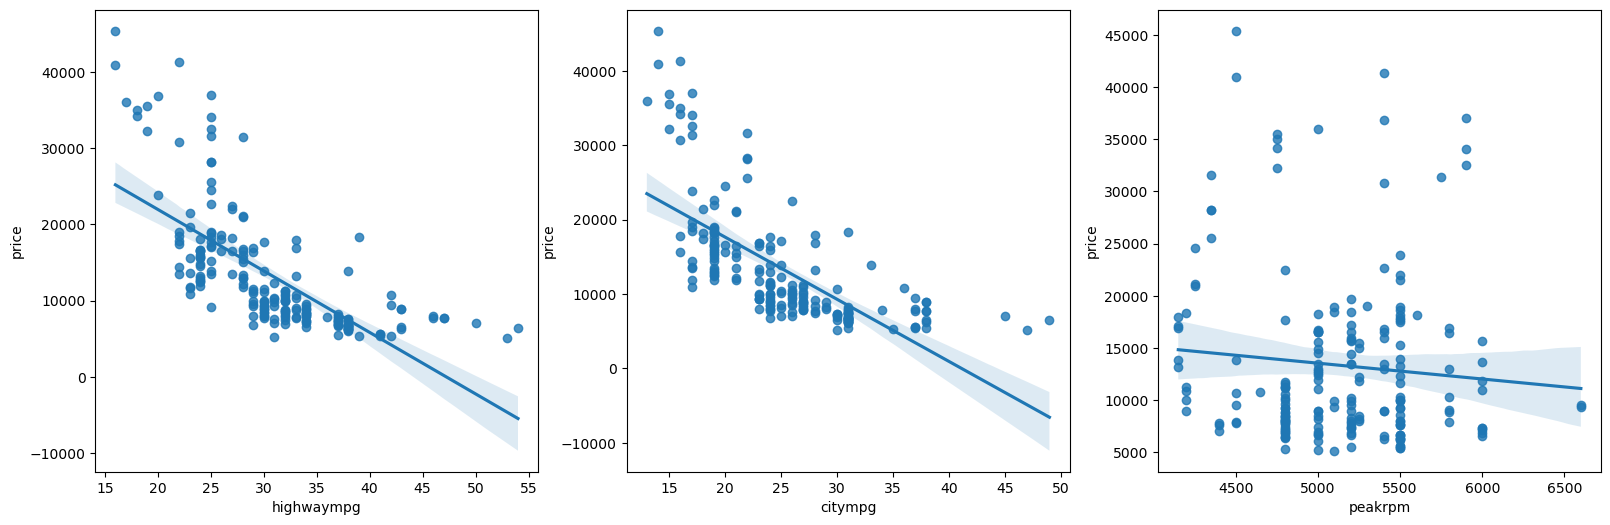

In [21]:
plt.figure(figsize=(40, 6))
plt.subplot(1,6,1)
sns.regplot(x= 'highwaympg', y='price', data=cars_df)

plt.subplot(1,6,2)
sns.regplot(x= 'citympg', y='price', data=cars_df)

plt.subplot(1,6,3)
sns.regplot(x= 'peakrpm', y='price', data=cars_df)

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming cars_df is already defined and loaded

# Calculate Pearson correlation and p-values
horsepower_p_value = pearsonr(cars_df['horsepower'], cars_df['price'])
enginesize_p_value = pearsonr(cars_df['enginesize'], cars_df['price'])
curbweight_p_value = pearsonr(cars_df['curbweight'], cars_df['price'])
carwidth_p_value = pearsonr(cars_df['carwidth'], cars_df['price'])
highway_p_value = pearsonr(cars_df['highwaympg'], cars_df['price'])
city_p_value = pearsonr(cars_df['citympg'], cars_df['price'])
peak_p_value = pearsonr(cars_df['peakrpm'], cars_df['price'])

print("Horsepower p-value:", horsepower_p_value)
print("Engine size p-value:", enginesize_p_value)
print("Curb weight p-value:", curbweight_p_value)
print("Car width p-value:", carwidth_p_value)
print("Highway MPG p-value:", highway_p_value)
print("City MPG p-value:", city_p_value)
print("Peak RPM p-value:", peak_p_value)


Horsepower p-value: PearsonRResult(statistic=0.8069859265729765, pvalue=7.369601810387712e-48)
Engine size p-value: PearsonRResult(statistic=0.8738856112785409, pvalue=7.001855346511957e-65)
Curb weight p-value: PearsonRResult(statistic=0.8339972169777913, pvalue=8.334257819397585e-54)
Car width p-value: PearsonRResult(statistic=0.7582502183459832, pvalue=3.36761240399053e-39)
Highway MPG p-value: PearsonRResult(statistic=-0.695519461746168, pvalue=1.1166094828712687e-30)
City MPG p-value: PearsonRResult(statistic=-0.6832357593755571, pvalue=2.9132050112658156e-29)
Peak RPM p-value: PearsonRResult(statistic=-0.09077436664548828, pvalue=0.19774252188263627)


In [23]:
p_value_t = pd.DataFrame({'Horsepower': horsepower_p_value, 'Engine_Size': enginesize_p_value, 'Curb_Weight': curbweight_p_value, 'Car_width': carwidth_p_value,
                        'Highway_Mpg': highway_p_value, 'City_mpg': city_p_value, 'Peak-rpm': peak_p_value })

In [24]:
#linear model #1
car_features = ['horsepower', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'highwaympg', 'citympg']
X = cars_df[car_features]
y = cars_df.price
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

#we will be use a pipeline for this multiple linear regression model
Input = [('scaler', StandardScaler()),('mode', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)
pipe_y = pipe.predict(val_X)
linear = pipe.score(val_X, val_y)

In [25]:
#polynomial model using ridge
Input_poly = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),('model', Ridge(alpha=0.1))]
pipe_poly = Pipeline(Input_poly)
pipe_poly.fit(train_X, train_y)
polynomial = pipe_poly.score(val_X, val_y)
polynomial_predict = pipe_poly.predict(val_X)

#let's make the predictions for later to see if
poly_predict_output = pd.DataFrame({ 'Horsepower':val_X.horsepower,'Enginesize':val_X.enginesize,'Curbweight':val_X.curbweight,
    'SalePrice': polynomial_predict
})


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Create dummy variables
car_brand2 = pd.get_dummies(cars_df['car_brand'], drop_first=True)
car_model2 = pd.get_dummies(cars_df['car_model'], drop_first=True)
fuel_type2 = pd.get_dummies(cars_df['fueltype'], drop_first=True)

# Combine all features
X1 = pd.concat([car_brand2, car_model2, fuel_type2, cars_df[['highwaympg', 'citympg']]], axis=1)
y1 = cars_df['price']

# Split the data
train_X, val_X, train_y, val_y = train_test_split(X1, y1, random_state=0)

# Create and fit the pipeline
Input = [('scaler', StandardScaler()), ('model', DecisionTreeRegressor())]
pipe = Pipeline(Input)
pipe.fit(train_X, train_y)

# Score and predict
decision_tree = pipe.score(val_X, val_y)
decision_tree_predict = pipe.predict(val_X)

# Create a DataFrame with predicted output, including car model, highwaympg, and citympg
# Use the original validation indices to map back to the original car_brand and car_model
val_indices = val_X.index
decision_tree_predict_output = pd.DataFrame({
    'Car_Brand': cars_df.loc[val_indices, 'car_brand'],
    'Car_Model': cars_df.loc[val_indices, 'car_model'],
    'Highway_mpg': val_X['highwaympg'],
    'City_mpg': val_X['citympg'],
    'Sales_Price': decision_tree_predict
})

print(decision_tree_predict_output.head())


     Car_Brand      Car_Model  Highway_mpg  City_mpg  Sales_Price
18   chevrolet         impala           53        47       6575.0
45       isuzu  D-Max V-Cross           43        38       6575.0
33       honda    accord cvcc           34        30       7295.0
37       honda         accord           33        27      10295.0
109    peugeot       504 (sw)           24        19      13295.0


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Create dummy variables
car_brand2 = pd.get_dummies(cars_df['car_brand'], drop_first=True)
car_model2 = pd.get_dummies(cars_df['car_model'], drop_first=True)
fuel_type2 = pd.get_dummies(cars_df['fueltype'], drop_first=True)

# Combine all features
X1 = pd.concat([car_brand2, car_model2, fuel_type2, cars_df[['highwaympg', 'citympg']]], axis=1)
y1 = cars_df['price']

# Split the data
train_X, val_X, train_y, val_y = train_test_split(X1, y1, random_state=0)

# Create and fit the Random Forest pipeline
Input2 = [('scaler', StandardScaler()), ('model', RandomForestRegressor())]
pipe2 = Pipeline(Input2)
pipe2.fit(train_X, train_y)

# Score and predict
random_forest_score = pipe2.score(val_X, val_y)
random_forest_prediction = pipe2.predict(val_X)

# Create a DataFrame with predicted output, including car model, highwaympg, and citympg
# Use the original validation indices to map back to the original car_brand and car_model
val_indices = val_X.index
random_forest_predict_output = pd.DataFrame({
    'Car_Brand': cars_df.loc[val_indices, 'car_brand'],
    'Car_Model': cars_df.loc[val_indices, 'car_model'],
    'Highway_mpg': val_X['highwaympg'],
    'City_mpg': val_X['citympg'],
    'Sales_Price': random_forest_prediction
})

print(random_forest_predict_output.head())


     Car_Brand      Car_Model  Highway_mpg  City_mpg   Sales_Price
18   chevrolet         impala           53        47   6798.210000
45       isuzu  D-Max V-Cross           43        38   6403.670000
33       honda    accord cvcc           34        30   7354.420000
37       honda         accord           33        27   9869.050000
109    peugeot       504 (sw)           24        19  14961.648353


In [28]:
# Assuming 'linear' and 'polynomial' variables are defined somewhere in your code

# Use the correct variable names
rscore_results = pd.DataFrame({
    'Linear': linear,
    'Polynomial': polynomial,
    'DecisionTree': decision_tree,
    'RandomForest': random_forest_score
}, index=[0])

print(rscore_results)

    Linear  Polynomial  DecisionTree  RandomForest
0  0.80754     0.84728      0.760358       0.84531


In [29]:
random_forest_predict_output.head()

,Car_Brand,Car_Model,Highway_mpg,City_mpg,Sales_Price
18,chevrolet,impala,53,47,6798.210000
45,isuzu,D-Max V-Cross,43,38,6403.670000
33,honda,accord cvcc,34,30,7354.420000
37,honda,accord,33,27,9869.050000
109,peugeot,504 (sw),24,19,14961.648353


In [30]:
poly_predict_output.head()

,Horsepower,Enginesize,Curbweight,SalePrice
18,48,61,1488,11408.888426
45,70,90,1909,5713.920963
33,76,92,1940,5574.785651
37,86,110,2236,7776.735472
109,97,120,3230,15619.390601
